# Animais: Pinguins de Kioto

https://bitbucket.org/mhfeng/penguins_of_kyoto/src/master/

### Resumo: Uma rede de relações sociais entre pinguins no Zoológico de Kyoto(Kyoto Aquarium). Os nós são pinguins, rotulados por nome, gênero e algumas "informações" divertidas sobre eles. As bordas representam diferentes tipos de relações sociais, incluindo casais, ex-namorados, "é complicado", amigos, inimigos e família, como caracterizado pelos humanos tratadores de pinguins. Este conjunto de dados é baseado na versão de 2020 do fluxograma de relações entre pinguins e contém 59 pinguins nomeados. Este conjunto de dados contém apenas pinguins nomeados (sem membros da equipe e sem ex-cônjuges não identificados). Propriedades do gráfo: Direcionado, Não ponderado, Multiplex, Metadados. 
#### Autores: H. Z. Brooks and M. Feng, "Penguins of Kyoto Multilayer Network." 

In [1]:
import os
print(os.getcwd())

C:\Users\educl


In [2]:
import networkx as nx
import os
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms import community
import community  # Certifique-se de que você importou o módulo community

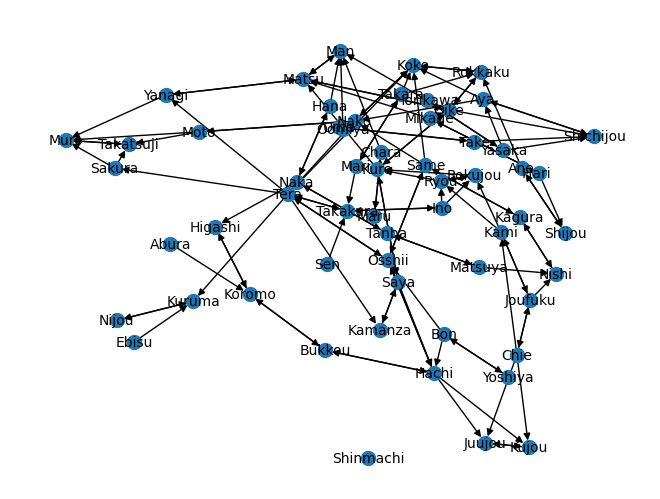

In [3]:
# Caminhos dos arquivos GEXF
files = [
    "Penguin_Couples.gexf",
    "Penguin_Enemies.gexf",
    "Penguin_Exes.gexf",
    "Penguin_Family.gexf",
    "Penguin_Friends.gexf"
]

# Cria um grafo direcionado vazio
complete_graph = nx.DiGraph()

# Combinando os grafos
for file in files:
    G = nx.read_gexf(file)
    complete_graph = nx.compose(complete_graph, G)

# Visualiza o grafo completo com espaçamento ajustado
pos = nx.spring_layout(complete_graph, k=0.3)  # Ajuste o valor de k conforme necessário
nx.draw(complete_graph, pos, with_labels=True, font_weight='normal', node_size=100, font_size=10)
plt.show()


Calculando os nós e arestas da rede de Pinguins

In [4]:
num_nodes = nx.number_of_nodes(complete_graph)
num_edges = nx.number_of_edges(complete_graph)

# Imprime os resultados
print(f"Quantidade de nós: {num_nodes}")
print(f"Quantidade de arestas: {num_edges}")

Quantidade de nós: 59
Quantidade de arestas: 128


### Nomes dos Animais

In [5]:
# Lista dos nomes dos nós
node_names = list(G.nodes())

# Cria uma matriz quadrada com os nomes dos nós
node_matrix = np.array([[f"{node1}-{node2}" for node2 in node_names] for node1 in node_names])

# Imprime a matriz
print(node_matrix)

[['Muro-Muro' 'Muro-Takatsuji' 'Muro-Juujou' ... 'Muro-Sen' 'Muro-Mari'
  'Muro-Hari ']
 ['Takatsuji-Muro' 'Takatsuji-Takatsuji' 'Takatsuji-Juujou' ...
  'Takatsuji-Sen' 'Takatsuji-Mari' 'Takatsuji-Hari ']
 ['Juujou-Muro' 'Juujou-Takatsuji' 'Juujou-Juujou' ... 'Juujou-Sen'
  'Juujou-Mari' 'Juujou-Hari ']
 ...
 ['Sen-Muro' 'Sen-Takatsuji' 'Sen-Juujou' ... 'Sen-Sen' 'Sen-Mari'
  'Sen-Hari ']
 ['Mari-Muro' 'Mari-Takatsuji' 'Mari-Juujou' ... 'Mari-Sen' 'Mari-Mari'
  'Mari-Hari ']
 ['Hari -Muro' 'Hari -Takatsuji' 'Hari -Juujou' ... 'Hari -Sen'
  'Hari -Mari' 'Hari -Hari ']]


Conectividade do Grafo:
A conectividade refere-se à facilidade com que você pode alcançar um nó a partir de outro no grafo. Existem várias formas de medir a conectividade de um grafo, e a mais comum é o grau médio.

In [6]:
avg_degree = sum(dict(nx.degree(complete_graph)).values()) / len(complete_graph)

# Imprime o resultado
print(f"Grau médio da rede: {avg_degree}")

print("Em média, um nó está conectado um pouco mais 3 outros nós, também conhecidos como vizinhos do nó.")

Grau médio da rede: 4.338983050847458
Em média, um nó está conectado um pouco mais 3 outros nós, também conhecidos como vizinhos do nó.


### Medidas Estatísticas

Grau Máximo: 2
Grau Mínimo: 0
Grau Médio: 0.06779661016949153
Desvio Padrão do Grau: 0.3619348560010614


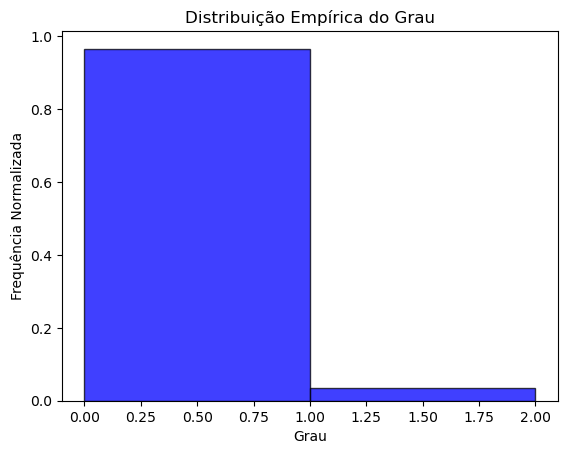

In [8]:
# Calcula o grau de cada nó no grafo
degree_sequence = [d for n, d in G.degree()]

# Calcula as estatísticas
degree_max = max(degree_sequence)
degree_min = min(degree_sequence)
degree_mean = np.mean(degree_sequence)
degree_std = np.std(degree_sequence)

# Exibe as estatísticas
print(f"Grau Máximo: {degree_max}")
print(f"Grau Mínimo: {degree_min}")
print(f"Grau Médio: {degree_mean}")
print(f"Desvio Padrão do Grau: {degree_std}")

# Plota a distribuição empírica do grau
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 1), density=True, alpha=0.75, color='b', edgecolor='black')
plt.title('Distribuição Empírica do Grau')
plt.xlabel('Grau')
plt.ylabel('Frequência Normalizada')
plt.show()

Densidade do Grafo:
A densidade de um grafo mede a proporção de arestas presentes em relação ao número total de arestas possível em um grafo completo. Quanto mais próximo de 1 for a densidade, mais conexões existem no grafo. 

In [9]:
density = nx.density(G)
print(f"Densidade do grafo: {density}")

Densidade do grafo: 0.0005844535359438924


A densidade do grafo é aproximadamente 0.000584. Isso significa que apenas uma pequena fração das possíveis conexões entre os nós está presente no grafo. O grafo parece ser relativamente esparsamente conectado. Interpretando de maneira mais prática, a densidade baixa sugere que há poucas conexões em comparação com todas as possíveis conexões entre os nós. Essa informação é útil para entender a estrutura geral da rede. Redes esparsamente conectadas podem indicar que o sistema que o grafo representa não é completamente interativo entre todos os seus elementos.

In [10]:
# Calcula a clusterização média
average_clustering = nx.average_clustering(G)

# Imprime o resultado
print(f"Clusterização média do grafo: {average_clustering:.2f}")

Clusterização média do grafo: 0.00


Essa medida fornece informações sobre a presença de agrupamentos ou cliques no grafo, indicando o quão conectados são os vizinhos de um nó. O valor de clusterização média é normalmente entre 0 e 1, com 0 indicando nenhum agrupamento e 1 indicando agrupamento máximo.

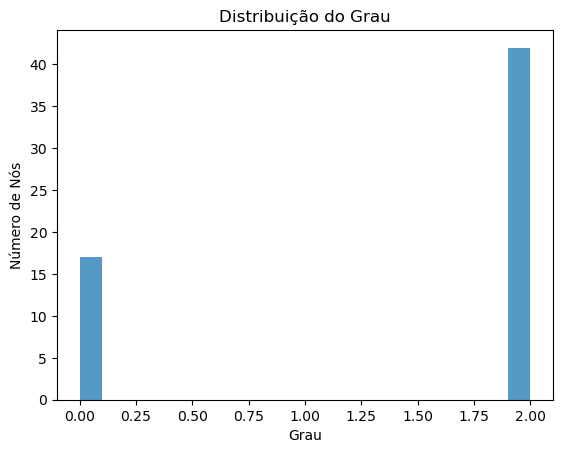

In [11]:
# Caminho do arquivo GEXF
file_path = "Penguin_Couples.gexf"

# Cria o grafo
G = nx.read_gexf(file_path)

# Calcula a distribuição do grau
degree_distribution = dict(G.degree())

# Plota o histograma da distribuição do grau
plt.hist(list(degree_distribution.values()), bins=20, alpha=0.75)
plt.title("Distribuição do Grau")
plt.xlabel("Grau")
plt.ylabel("Número de Nós")
plt.show()

In [12]:
# Caminho do arquivo GEXF
file_path = "Penguin_Couples.gexf"

# Cria o grafo
G = nx.read_gexf(file_path)

# Calcula o grau máximo
max_degree = max(dict(G.degree()).values())

# Imprime o resultado
print(f"Grau máximo da rede: {max_degree}")

Grau máximo da rede: 2


### Medidas de Centralidades

Centralidade: Existem várias medidas de centralidade em redes, e cada uma fornece uma perspectiva diferente sobre a importância dos nós em um grafo. Algumas medidas comuns incluem a centralidade de grau, a centralidade de intermediação (betweenness centrality) e a centralidade de proximidade (closeness centrality).

In [13]:
# Calcula as métricas de centralidade
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Exibe uma amostra de 10 nós para cada métrica de centralidade
print("Centralidade de Grau:")
for node, centrality in list(degree_centrality.items())[:10]:
    print(f"{node}: {centrality:.4f}")

print("\nCentralidade de Intermediação:")
for node, centrality in list(betweenness_centrality.items())[:10]:
    print(f"{node}: {centrality:.4f}")

print("\nCentralidade de Proximidade:")
for node, centrality in list(closeness_centrality.items())[:10]:
    print(f"{node}: {centrality:.4f}")

Centralidade de Grau:
Muro: 0.0345
Takatsuji: 0.0345
Juujou: 0.0345
Kujou: 0.0345
Kamanza: 0.0345
Ryou: 0.0345
Rokujou: 0.0345
Nishi: 0.0000
Yanagi: 0.0000
Sakura: 0.0000

Centralidade de Intermediação:
Muro: 0.0000
Takatsuji: 0.0000
Juujou: 0.0000
Kujou: 0.0000
Kamanza: 0.0000
Ryou: 0.0000
Rokujou: 0.0000
Nishi: 0.0000
Yanagi: 0.0000
Sakura: 0.0000

Centralidade de Proximidade:
Muro: 0.0172
Takatsuji: 0.0172
Juujou: 0.0172
Kujou: 0.0172
Kamanza: 0.0172
Ryou: 0.0172
Rokujou: 0.0172
Nishi: 0.0000
Yanagi: 0.0000
Sakura: 0.0000


### Centralidade de Katz

A centralidade de Katz atribui importância a um nó com base na soma das importâncias dos nós que estão conectados a ele

In [14]:
#Calcula a centralidade de Katz
alpha = 0.1  # Parâmetro de atenuação
katz_centrality = nx.katz_centrality(G, alpha=alpha)

# Exibe os resultados
print("Centralidade de Katz:")
for node, centrality in katz_centrality.items():
    print(f"{node}: {centrality:.4f}")

Centralidade de Katz:
Muro: 0.1339
Takatsuji: 0.1339
Juujou: 0.1339
Kujou: 0.1339
Kamanza: 0.1339
Ryou: 0.1339
Rokujou: 0.1339
Nishi: 0.1205
Yanagi: 0.1205
Sakura: 0.1205
Moto: 0.1339
Osshii: 0.1339
Hachi: 0.1339
Chie: 0.1339
Kami: 0.1205
Ino: 0.1339
Joufuku: 0.1339
Kagura: 0.1205
Matsuya: 0.1339
Saya: 0.1339
Bon: 0.1339
Oike: 0.1205
Matsu: 0.1339
Man: 0.1339
Nako: 0.1339
Kuruma: 0.1205
Koko: 0.1339
Rokkaku: 0.1339
Takara: 0.1339
Same: 0.1205
Tera: 0.1339
Aya: 0.1205
Shichijou: 0.1205
Ebisu: 0.1205
Nijou: 0.1205
Hana: 0.1339
Oomiya: 0.1205
Chara: 0.1339
Horikawa: 0.1339
Mikage: 0.1339
Kuro: 0.1205
Higashi: 0.1339
Ane: 0.1339
Shijou: 0.1339
Shinmachi: 0.1205
Takakura: 0.1339
Yasaka: 0.1339
Take: 0.1339
Ume: 0.1339
Koromo: 0.1339
Maru: 0.1339
Naka: 0.1339
Yoshiya: 0.1339
Tanba: 0.1339
Bukkou: 0.1339
Abura: 0.1205
Sen: 0.1205
Mari: 0.1339
Hari : 0.1339


### PageRank

O algoritmo PageRank atribui importância a um nó com base nas ligações recebidas e na importância dos nós que fazem essas ligações.

In [15]:
# Calcula o PageRank
pagerank_centrality = nx.pagerank(G)

# Exibe os resultados
print("PageRank:")
for node, centrality in pagerank_centrality.items():
    print(f"{node}: {centrality:.4f}")

PageRank:
Muro: 0.0224
Takatsuji: 0.0224
Juujou: 0.0224
Kujou: 0.0224
Kamanza: 0.0224
Ryou: 0.0224
Rokujou: 0.0224
Nishi: 0.0034
Yanagi: 0.0034
Sakura: 0.0034
Moto: 0.0224
Osshii: 0.0224
Hachi: 0.0224
Chie: 0.0224
Kami: 0.0034
Ino: 0.0224
Joufuku: 0.0224
Kagura: 0.0034
Matsuya: 0.0224
Saya: 0.0224
Bon: 0.0224
Oike: 0.0034
Matsu: 0.0224
Man: 0.0224
Nako: 0.0224
Kuruma: 0.0034
Koko: 0.0224
Rokkaku: 0.0224
Takara: 0.0224
Same: 0.0034
Tera: 0.0224
Aya: 0.0034
Shichijou: 0.0034
Ebisu: 0.0034
Nijou: 0.0034
Hana: 0.0224
Oomiya: 0.0034
Chara: 0.0224
Horikawa: 0.0224
Mikage: 0.0224
Kuro: 0.0034
Higashi: 0.0224
Ane: 0.0224
Shijou: 0.0224
Shinmachi: 0.0034
Takakura: 0.0224
Yasaka: 0.0224
Take: 0.0224
Ume: 0.0224
Koromo: 0.0224
Maru: 0.0224
Naka: 0.0224
Yoshiya: 0.0224
Tanba: 0.0224
Bukkou: 0.0224
Abura: 0.0034
Sen: 0.0034
Mari: 0.0224
Hari : 0.0224


### O coeficiente de assortatividade 

O coeficiente de assortatividade é uma medida que quantifica a tendência de nós com características semelhantes (como grau) se conectarem entre si em uma rede.O resultado será um valor entre -1 e 1. Um valor positivo indica assortatividade (tendência de nós com graus semelhantes se conectarem), enquanto um valor negativo indica disassortatividade (tendência de nós com graus diferentes se conectarem). Quanto mais próximo de 1 (positivo) ou -1 (negativo), mais forte é a tendência.

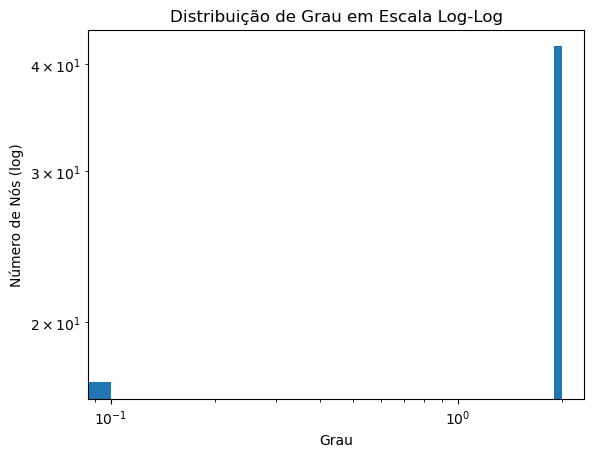

In [80]:
# Caminho do arquivo GEXF
file_path = "Penguin_Couples.gexf"

# Cria o grafo
G = nx.read_gexf(file_path)

# Calcula a distribuição do grau
degree_distribution = dict(G.degree())

# Plota o gráfico de distribuição de grau em escala log-log
degrees = list(degree_distribution.values())
plt.hist(degrees, bins=20, log=True)
plt.xscale("log")
plt.yscale("log")
plt.title("Distribuição de Grau em Escala Log-Log")
plt.xlabel("Grau")
plt.ylabel("Número de Nós (log)")
plt.show()

O gráfico de resultado da distribuição de assortatividade foi pouco conclusivo.

### Maximização de Modularidade

Usa o algoritmo de maximização de modularidade para detectar comunidades no grafo. O resultado é uma lista de conjuntos, onde cada conjunto representa uma comunidade de nós. A interpretação principal é que está sendo identificado grupos de nós (comunidades) no grafo, onde os nós dentro de uma comunidade têm uma conexão mais forte entre si do que com os nós fora da comunidade. O algoritmo utilizado (maximização de modularidade) é uma abordagem comum para detectar essas estruturas em grafos.

In [81]:
# Caminho do arquivo GEXF
file_path = "Penguin_Couples.gexf"

# Cria o grafo
G = nx.read_gexf(file_path)

# Calcula as comunidades usando o método interno do NetworkX
communities = list(nx.algorithms.community.greedy_modularity_communities(G))

# Exibe os resultados
print("Comunidades:")
for i, community_nodes in enumerate(communities):
    print(f"Comunidade {i + 1}: {list(community_nodes)}")

Comunidades:
Comunidade 1: ['Muro', 'Takatsuji']
Comunidade 2: ['Kujou', 'Juujou']
Comunidade 3: ['Rokujou', 'Ryou']
Comunidade 4: ['Bukkou', 'Hachi']
Comunidade 5: ['Joufuku', 'Chie']
Comunidade 6: ['Kamanza', 'Saya']
Comunidade 7: ['Matsu', 'Man']
Comunidade 8: ['Nako', 'Moto']
Comunidade 9: ['Koko', 'Rokkaku']
Comunidade 10: ['Takara', 'Mari']
Comunidade 11: ['Osshii', 'Tera']
Comunidade 12: ['Hari ', 'Mikage']
Comunidade 13: ['Shijou', 'Ane']
Comunidade 14: ['Takakura', 'Ino']
Comunidade 15: ['Yasaka', 'Horikawa']
Comunidade 16: ['Ume', 'Take']
Comunidade 17: ['Koromo', 'Higashi']
Comunidade 18: ['Chara', 'Maru']
Comunidade 19: ['Hana', 'Naka']
Comunidade 20: ['Yoshiya', 'Bon']
Comunidade 21: ['Matsuya', 'Tanba']
Comunidade 22: ['Nishi']
Comunidade 23: ['Yanagi']
Comunidade 24: ['Sakura']
Comunidade 25: ['Kami']
Comunidade 26: ['Kagura']
Comunidade 27: ['Oike']
Comunidade 28: ['Kuruma']
Comunidade 29: ['Same']
Comunidade 30: ['Aya']
Comunidade 31: ['Shichijou']
Comunidade 32: ['Ebi

### Girvan-Newman

Avaliando sobre uma detecção de comunidades baseada em modularidade, e considerando a menção a M. Ravasz em 2002, é possível que o algoritmo de Girvan-Newman, que foi proposto por M. Girvan e M. E. J. Newman em 2002.
O algoritmo de Girvan-Newman é um método hierárquico que se baseia na ideia de decompor gradualmente a rede removendo arestas com base na medida de betweenness centralidade. O betweenness centralidade de uma aresta é uma medida que quantifica o número de caminhos mais curtos entre pares de nós que passam por essa aresta.

In [82]:
# Calcula as comunidades usando o algoritmo de Girvan-Newman
communities_generator = girvan_newman(G)
communities = next(communities_generator)

# Exibe os resultados
print("Comunidades:")
for i, community_nodes in enumerate(communities):
    print(f"Comunidade {i + 1}: {list(community_nodes)}")

Comunidades:
Comunidade 1: ['Muro']
Comunidade 2: ['Takatsuji']
Comunidade 3: ['Kujou', 'Juujou']
Comunidade 4: ['Kamanza', 'Saya']
Comunidade 5: ['Ryou', 'Rokujou']
Comunidade 6: ['Nishi']
Comunidade 7: ['Yanagi']
Comunidade 8: ['Sakura']
Comunidade 9: ['Nako', 'Moto']
Comunidade 10: ['Osshii', 'Tera']
Comunidade 11: ['Bukkou', 'Hachi']
Comunidade 12: ['Joufuku', 'Chie']
Comunidade 13: ['Kami']
Comunidade 14: ['Takakura', 'Ino']
Comunidade 15: ['Kagura']
Comunidade 16: ['Matsuya', 'Tanba']
Comunidade 17: ['Yoshiya', 'Bon']
Comunidade 18: ['Oike']
Comunidade 19: ['Man', 'Matsu']
Comunidade 20: ['Kuruma']
Comunidade 21: ['Koko', 'Rokkaku']
Comunidade 22: ['Takara', 'Mari']
Comunidade 23: ['Same']
Comunidade 24: ['Aya']
Comunidade 25: ['Shichijou']
Comunidade 26: ['Ebisu']
Comunidade 27: ['Nijou']
Comunidade 28: ['Hana', 'Naka']
Comunidade 29: ['Oomiya']
Comunidade 30: ['Chara', 'Maru']
Comunidade 31: ['Yasaka', 'Horikawa']
Comunidade 32: ['Hari ', 'Mikage']
Comunidade 33: ['Kuro']
Comun

In [83]:
# Cria o grafo não direcionado
G = nx.read_gexf(file_path)
G = G.to_undirected()

# Calcula as comunidades usando o algoritmo de Louvain
partition = community.best_partition(G)

# Converte a partição para um formato adequado
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = [node]
    else:
        communities[community_id].append(node)

# Calcula a modularidade das comunidades
modularity = community.modularity(partition, G)
print(f"Modularidade das comunidades: {modularity:.4f}")

Modularidade das comunidades: 0.9524


### Algoritmo de Louvain

A detecção de comunidades em redes é uma área ativa de pesquisa, e existem vários algoritmos disponíveis. O algoritmo de Louvain é um método popular para detecção de comunidades em grafos. Ele é eficiente e frequentemente produz partições de alta qualidade. "Community.best_partition(G)" calcula a partição de comunidades utilizando o algoritmo de Louvain no grafo G.
Em seguida, os resultados são organizados em conjuntos de nós para cada comunidade. Os conjuntos de nós são exibidos no final, indicando os nós que pertencem a cada comunidade.

In [84]:
import networkx as nx
import community

# Caminho do arquivo GEXF
file_path = "Penguin_Couples.gexf"

# Cria o grafo não direcionado
G = nx.read_gexf(file_path)
G = G.to_undirected()

# Calcula as comunidades usando o algoritmo de Louvain
partition = community.best_partition(G)

# Organiza os resultados em conjuntos de nós para cada comunidade
community_sets = {}
for node, community_id in partition.items():
    if community_id not in community_sets:
        community_sets[community_id] = set()
    community_sets[community_id].add(node)

# Exibe os resultados
print("Comunidades:")
for i, community_nodes in community_sets.items():
    print(f"Comunidade {i + 1}: {list(community_nodes)}")


Comunidades:
Comunidade 1: ['Muro', 'Takatsuji']
Comunidade 4: ['Kujou', 'Juujou']
Comunidade 20: ['Kamanza', 'Saya']
Comunidade 6: ['Ryou', 'Rokujou']
Comunidade 8: ['Nishi']
Comunidade 9: ['Yanagi']
Comunidade 10: ['Sakura']
Comunidade 11: ['Nako', 'Moto']
Comunidade 31: ['Osshii', 'Tera']
Comunidade 16: ['Bukkou', 'Hachi']
Comunidade 17: ['Joufuku', 'Chie']
Comunidade 15: ['Kami']
Comunidade 38: ['Takakura', 'Ino']
Comunidade 18: ['Kagura']
Comunidade 19: ['Matsuya', 'Tanba']
Comunidade 21: ['Yoshiya', 'Bon']
Comunidade 22: ['Oike']
Comunidade 23: ['Man', 'Matsu']
Comunidade 26: ['Kuruma']
Comunidade 27: ['Koko', 'Rokkaku']
Comunidade 29: ['Takara', 'Mari']
Comunidade 30: ['Same']
Comunidade 32: ['Aya']
Comunidade 33: ['Shichijou']
Comunidade 34: ['Ebisu']
Comunidade 35: ['Nijou']
Comunidade 14: ['Hana', 'Naka']
Comunidade 37: ['Oomiya']
Comunidade 13: ['Chara', 'Maru']
Comunidade 2: ['Yasaka', 'Horikawa']
Comunidade 28: ['Hari ', 'Mikage']
Comunidade 3: ['Kuro']
Comunidade 12: ['Ko

Apesar de os grupos das comunidades entre os algoritmos de Girvan-Newman e Louvain efetuarem proposições diferenciadas de comunidades, seus valores de modularidades foram semelhantes.

### Medindo Qualidade da Partição

A modularidade é uma medida que quantifica a qualidade da divisão de um grafo em comunidades. Quanto maior o valor da modularidade, melhor é a divisão em comunidades. O resultado será entre -1 e 1, onde valores mais próximos de 1 indicam uma boa modularidade da divisão em comunidades.

In [85]:
# Caminho do arquivo GEXF
file_path = "Penguin_Couples.gexf"

# Cria o grafo não direcionado
G = nx.read_gexf(file_path)
G = G.to_undirected()

# Calcula as comunidades usando o algoritmo de Louvain
partition = community.best_partition(G)

# Calcula a modularidade
modularity = community.modularity(partition, G)

# Exibe o valor da modularidade
print(f"Modularidade da partição: {modularity:.4f}")

Modularidade da partição: 0.9524
